<a href="https://colab.research.google.com/github/itissandeep98/ML-Assignments/blob/master/Assignment2/ML_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [199]:
import h5py 
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from math import pi,exp,sqrt
from tabulate import tabulate
import matplotlib.pyplot as plt

In [91]:
from sklearn.manifold import TSNE
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV,ParameterGrid

## Pre Processing

In [92]:
class MyPreProcessor():
  """
  My steps for pre-processing for the three datasets.
  """

  def __init__(self):
    pass
  def convert_n_to_1(self,mat):
    z=np.zeros((mat.shape[0]))
    for i in range(mat.shape[1]):
      z[mat[:,i]==1]=i
    z=z.astype(int)
    return z

  def pre_process(self, dataset):
    """
    Reading the file and preprocessing the input and output.
    Note that you will encode any string value and/or remove empty entries in this function only.
    Further any pre processing steps have to be performed in this function too. 

    Parameters
    ----------

    dataset : integer with acceptable values 0, 1, or 2
    0 ->  Dataset
    1 ->  Dataset
    2 ->  Dataset

    Returns
    -------
    X : 2-dimensional numpy array of shape (n_samples, n_features)
    y : 1-dimensional numpy array of shape (n_samples,)
    """
    scaler = StandardScaler()
    if dataset == 0:
      df=h5py.File("/content/drive/My Drive/part_A_train.h5", "r")
      X=np.array(df['X'])
      y=np.array(df['Y'])
      y=self.convert_n_to_1(y)
      X = scaler.fit_transform(X)
    
    elif dataset == 1:
      df=h5py.File("/content/drive/My Drive/part_B_train.h5", "r")
      X=np.array(df['X'])
      y=np.array(df['Y'])
      y=self.convert_n_to_1(y)
      X = scaler.fit_transform(X)

    elif dataset == 2:
      df=pd.read_csv("/content/drive/My Drive/weight-height.csv")
      df['Gender'].replace('Male',0,inplace=True)
      df['Gender'].replace('Female',1,inplace=True)
      df['Height'],df['Weight']=df['Weight'].copy(),df['Height'].copy()
      df=df.sample(frac=1,random_state=4)
     
      X=df['Height'].to_numpy()
      X=np.reshape(X,(X.shape[0],1))
      y=df['Weight'].to_numpy()
    
    return X, y

## Q1

In [93]:
def analysis(X_train, X_test, y_train, y_test):
  logistic = LogisticRegression(max_iter=10000)
  logistic.fit(X_train,y_train)
  y_pred=logistic.predict(X_test)

  print("Accuracy:",accuracy_score(y_test,y_pred))

  tsne = TSNE(n_components=2, verbose=2, n_iter=1000)
  tsne_results = tsne.fit_transform(X_train)

  plt.figure(figsize=(16,10))
  sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    hue=y_train,
    palette=sns.color_palette("hls", 10),
    legend="full"
  )

In [94]:
preprocessor = MyPreProcessor()
X, y = preprocessor.pre_process(0)
print(X.shape,y.shape)

(4200, 784) (4200,)


### d)

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20)
freq = np.bincount(y_train)
items = np.nonzero(freq)[0]
print("Training Sample")
print("size:",y_train.shape[0])
print(*list(zip(items,freq[items]))) 
freq = np.bincount(y_test)
items = np.nonzero(freq)[0]
print("Testing Sample")
print("size:",y_test.shape[0])
print(*list(zip(items,freq[items]))) 

Training Sample
size: 3360
(0, 320) (1, 395) (2, 314) (3, 339) (4, 333) (5, 318) (6, 353) (7, 345) (8, 328) (9, 315)
Testing Sample
size: 840
(0, 80) (1, 99) (2, 79) (3, 85) (4, 83) (5, 80) (6, 88) (7, 86) (8, 82) (9, 78)


### e)

Accuracy: 0.8940476190476191
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3360 samples in 0.028s...
[t-SNE] Computed neighbors for 3360 samples in 1.251s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3360
[t-SNE] Computed conditional probabilities for sample 2000 / 3360
[t-SNE] Computed conditional probabilities for sample 3000 / 3360
[t-SNE] Computed conditional probabilities for sample 3360 / 3360
[t-SNE] Mean sigma: 4.457778
[t-SNE] Computed conditional probabilities in 0.231s
[t-SNE] Iteration 50: error = 84.0764771, gradient norm = 0.0028082 (50 iterations in 1.668s)
[t-SNE] Iteration 100: error = 78.7281647, gradient norm = 0.0024942 (50 iterations in 1.600s)
[t-SNE] Iteration 150: error = 78.5466919, gradient norm = 0.0001365 (50 iterations in 1.322s)
[t-SNE] Iteration 200: error = 78.5451660, gradient norm = 0.0000937 (50 iterations in 1.363s)
[t-SNE] Iteration 250: error = 78.5450668, gradient norm = 0.0001030 (50 iterations in 1.328s)
[t-SNE] KL

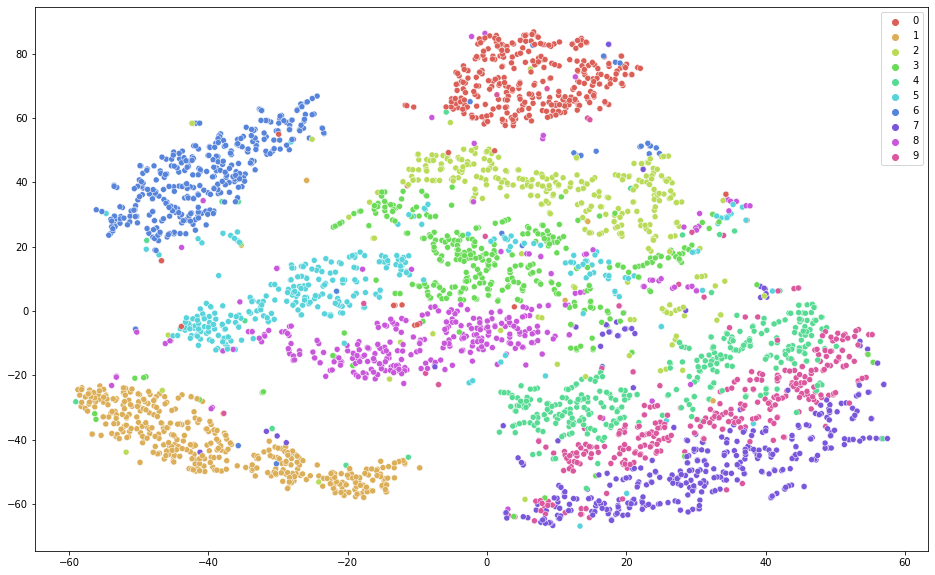

In [96]:
pca = PCA(n_components=50) 
X_train_pca = pca.fit_transform(X_train) 
X_test_pca = pca.transform(X_test) 
analysis(X_train_pca, X_test_pca, y_train, y_test)

### f)

Accuracy: 0.8964285714285715
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3360 samples in 0.020s...
[t-SNE] Computed neighbors for 3360 samples in 1.222s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3360
[t-SNE] Computed conditional probabilities for sample 2000 / 3360
[t-SNE] Computed conditional probabilities for sample 3000 / 3360
[t-SNE] Computed conditional probabilities for sample 3360 / 3360
[t-SNE] Mean sigma: 4.302172
[t-SNE] Computed conditional probabilities in 0.209s
[t-SNE] Iteration 50: error = 84.2083435, gradient norm = 0.0030714 (50 iterations in 1.673s)
[t-SNE] Iteration 100: error = 78.8515930, gradient norm = 0.0040999 (50 iterations in 1.454s)
[t-SNE] Iteration 150: error = 78.6585236, gradient norm = 0.0003832 (50 iterations in 1.379s)
[t-SNE] Iteration 200: error = 78.6535492, gradient norm = 0.0000839 (50 iterations in 1.361s)
[t-SNE] Iteration 250: error = 78.6530075, gradient norm = 0.0001378 (50 iterations in 1.355s)
[t-SNE] KL

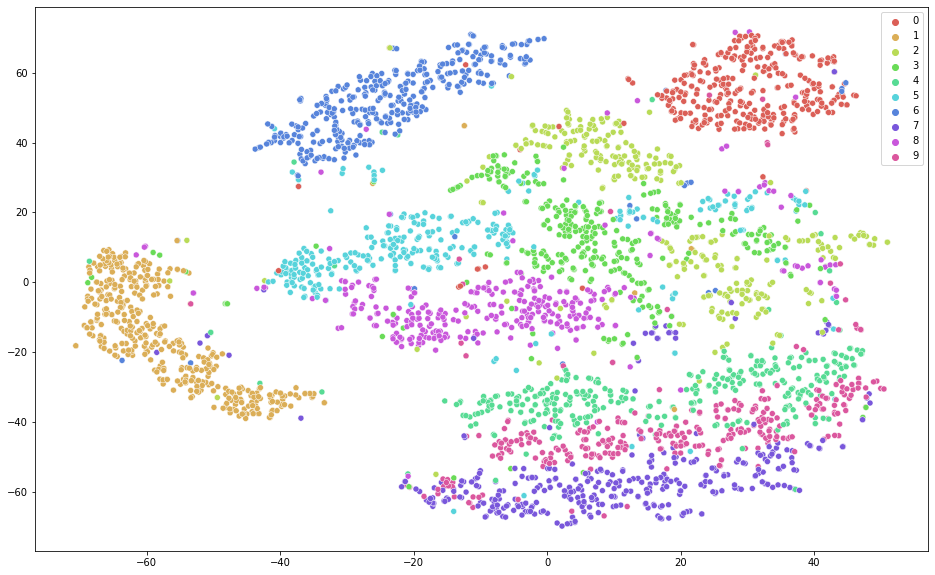

In [97]:
svd = TruncatedSVD(n_components=50)
X_train_svd=svd.fit_transform(X_train)
X_test_svd=svd.transform(X_test)
analysis(X_train_svd, X_test_svd, y_train, y_test)

## Q2

In [98]:
def create_sample(X_train,y_train):
  y=np.array([])
  X=np.array([])
  
  for i in range(y_train.shape[0]):
    idx=np.random.randint(0,y_train.shape[0])
    X=np.append(X,X_train[idx])
    y=np.append(y,y_train[idx])
  X=X.reshape((X.shape[0],1))
  return X,y


In [99]:
preprocessor= MyPreProcessor()
X,y=preprocessor.pre_process(2)
B=100
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

predictions=None
for _ in range(B):
  X_temp,y_temp=create_sample(X_train,y_train)

  linear=LinearRegression()
  linear.fit(X_temp,y_temp)

  temp=X_test.dot(linear.coef_)+linear.intercept_
  temp=temp.reshape((temp.shape[0],1))

  if(predictions is not None):
    predictions=np.concatenate((predictions,temp),axis=1)
  else:
    predictions=temp
  
avg_pred=np.mean(predictions,axis=1)
diff=avg_pred-y_test

bias=abs(diff).mean()

avg=avg_pred.reshape((avg_pred.shape[0],1))
variance=(1/(B-1))*np.sum((predictions-avg)**2,axis=1)
variance=variance.mean()

y_test=y_test.reshape((y_test.shape[0],1))
MSE=(1/B)*np.sum((predictions-y_test)**2,axis=1)
MSE=MSE.mean()

print("Bias:",bias)
print("Variance:",variance)
print("MSE:",MSE)
print(MSE-bias**2-variance)

Bias: 1.1838702188528007
Variance: 0.00043680512185450957
MSE: 2.2200695628111826
0.8180840626027498


## Q3

### a,b,c

#### GridSearch Implementation

In [100]:
class GridSearch():
  def __init__(self,estimator,params={},cv=5):
    self.estimator=estimator
    self.k=cv
    self.depths=params['max_depth']
    self.grid=list(ParameterGrid(params))

  def fit(self,X,y):
    validation_acc=[]
    training_acc=[]
    max_val=-1
    for i in range(len(self.grid)):
      params=self.grid[i]
      self.estimator.set_params(**params)
      val,train=self.k_fold(X,y)
      print(params,"Validation Accuracy:",val,"Training Accuracy:",train)
      validation_acc.append(val)
      training_acc.append(train)
      if(val>max_val):
        pickle.dump(self.estimator,open('model','wb'))
        max_val=val

    plt.plot(self.depths,validation_acc,color="g", label="validation Accuracy")
    plt.plot(self.depths,training_acc,color="r", label="training Accuracy")
    plt.xlabel('Depth')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

  def k_fold(self,X,y):
    
    m=X.shape[0] # number of samples

    split_start=0 # initial split's first index
    split_end=m//4 # initial split's last index
    score_val=0
    score_train=0

    for i in range(self.k):
      X_train=np.concatenate((X[:split_start],X[split_end:]))
      y_train=np.concatenate((y[:split_start],y[split_end:]),axis=0)

      X_val=X[split_start:split_end]
      y_val=y[split_start:split_end]

      split_start+=100
      split_end+=100

      self.estimator.fit(X_train,y_train)
      score_val+=self.estimator.score(X_val,y_val)
      score_train+=self.estimator.score(X_train,y_train)

    return score_val/self.k, score_train/self.k


#### Testing

{'max_depth': 2} Validation Accuracy: 0.5728571428571428 Training Accuracy: 0.612936507936508
{'max_depth': 3} Validation Accuracy: 0.5650000000000001 Training Accuracy: 0.6378571428571428
{'max_depth': 4} Validation Accuracy: 0.5845238095238094 Training Accuracy: 0.6714285714285715
{'max_depth': 5} Validation Accuracy: 0.5807142857142857 Training Accuracy: 0.7178571428571429
{'max_depth': 6} Validation Accuracy: 0.5790476190476191 Training Accuracy: 0.7625396825396825
{'max_depth': 7} Validation Accuracy: 0.582857142857143 Training Accuracy: 0.808968253968254
{'max_depth': 8} Validation Accuracy: 0.5833333333333334 Training Accuracy: 0.8492063492063492
{'max_depth': 9} Validation Accuracy: 0.5776190476190476 Training Accuracy: 0.8895238095238096
{'max_depth': 10} Validation Accuracy: 0.5811904761904763 Training Accuracy: 0.9226984126984126
{'max_depth': 11} Validation Accuracy: 0.5771428571428572 Training Accuracy: 0.9462698412698414
{'max_depth': 12} Validation Accuracy: 0.5754761904

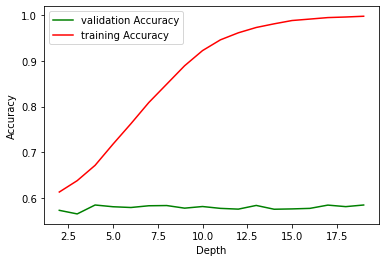

0.5773809523809523

In [231]:
preprocessor = MyPreProcessor()
X, y = preprocessor.pre_process(1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20, random_state=40)
dt= DecisionTreeClassifier()
params = {'max_depth': list(range(2, 20))}
grid_search_cv = GridSearch(dt,params)

grid_search_cv.fit(X_train, y_train)

model=pickle.load(open('model','rb'))
model.score(X_test,y_test)

### d

In [323]:
class Evaluation_Metric():
  def __init__(self,model,X,y):
    self.y=y
    self.y_pred=model.predict(X)
    self.prob=model.predict_proba(X)
    self.matrix=self.confusion_matrix(self.y,self.y_pred)
  
  def confusion_matrix(self,y,y_pred):
    K = len(np.unique(y)) # Number of classes 
    result = np.zeros((K, K))

    for i in range(len(y)):
      result[y[i]][y_pred[i]] += 1
    result=result.astype(int)

    return result

  def asses(self):
    print("Confusion Matrix")
    print(tabulate(self.matrix))
    print("*-"*30)

    K = len(np.unique(self.y))
    if(K>2):
      data=np.zeros((K,3))
    else:
      data=np.zeros((1,3))
    data[:,0]=self.precision()
    data[:,1]=self.recall()
    data[:,2]=self.F1score()
   
    print(tabulate(data,headers=['Precision','Recall','F1-score']))
    
    if(K>2):
      data=[["Accuracy/Micro-average:",self.accuracy()],["Macro-Average:", * self.macro_average()]]
      print(tabulate(data))
    else:
      data=[["Accuracy:",self.accuracy()]]
      print(tabulate(data))
    self.plotROC()
      

  def macro_average(self):    
    return [self.precision().mean(),self.recall().mean(),self.F1score().mean()]

  def accuracy(self):
    return self.matrix.trace()/self.matrix.sum()

  def precision(self):
    K = len(np.unique(self.y))
    labels=np.zeros(K)
    if(K==2):
      return self.matrix[1,1]/self.matrix[:,1].sum()

    for i in range(K):
      labels[i]=self.matrix[i][i]/self.matrix[:,i].sum()

    return labels

  def recall(self):
    K = len(np.unique(self.y))
    labels=np.zeros(K)
    if(K==2):
      return self.matrix[1,1]/self.matrix[1].sum()

    for i in range(K):
      labels[i]=self.matrix[i][i]/self.matrix[i].sum()

    return labels

  def F1score(self):
    prec=self.precision()
    recall=self.recall()
    return 2*(prec*recall)/(prec+recall)
  
  def prediction(self,prob,thresh):
    y=np.zeros((prob.shape[0],1))
    y[prob[:,0]<thresh]=0
    y[prob[:,1]>=thresh]=1
    return np.squeeze(y).astype(int)

  def plotROC(self):
    thresh=0.01
    TPR=[]
    FPR=[]
    prob=self.prob
    while(thresh<=1):
      y_pred=self.prediction(prob,thresh)
      print(tabulate([y.T,y_pred.T]))
      matrix=self.confusion_matrix(self.y,y_pred)
     
      FPR.append(matrix[0,1]/matrix[0].sum())
      TPR.append(matrix[1,1]/matrix[:,1].sum())

      thresh+=0.01

    plt.plot(FPR,TPR)
    print(FPR)
    print(TPR)
      



In [324]:
model=pickle.load(open('model','rb'))
metric=Evaluation_Metric(model,X,y)

In [ ]:
metric.asses()

## Q4

### Implementation

In [106]:
class NaiveBayes():
  def __init__(self):
    pass

  def calculateStats(self,X,size):
    stats = np.array([[np.mean(col), np.var(col),X.shape[0]/size] for col in zip(*X)])
    return stats

  def separateByClass(self,X,y):
    separated={}
    for i in range(X.shape[0]):
      if(y[i] in separated):
        separated[y[i]]=np.concatenate([separated[y[i]],[X[i]]])
      else:
        separated[y[i]]=[X[i]]
    
    return separated

  def fit(self,X,y):
      separated= self.separateByClass(X,y)
      self.stats={}
      for label in separated:
        self.stats[label]=self.calculateStats(separated[label],X.shape[0])
        
      return self.stats

  def calculateGaussian(self,x, mean, var):
    if(var<10**-7):
      return 0
    exponent = -((x-mean)**2 / (2 * var ))
    return np.log((1 / np.sqrt(2 * pi * var))) + exponent

  
  def calculateClassProbability(self,X):
    probabilities={}
    for label in self.stats:
      probabilities[label]=0
      for col in range(X.shape[0]):
        mean,var,_=self.stats[label][col]
        probabilities[label]+=self.calculateGaussian(X[col],mean,var)
        assert probabilities[label]!=float("-inf"),"data:"+str(mean)+" "+str(var) +" col:"+str(col)

    return probabilities


  def getPrediction(self,X):
    bestlabel=0
    max_prob=float("-inf")
    probabilities=self.calculateClassProbability(X)
    # print(probabilities)
    for label in probabilities:
      if(max_prob<probabilities[label]):
        max_prob=probabilities[label]
        bestlabel=label
    return bestlabel


  def predict(self,X):
    y=np.array([])
    for i in range(X.shape[0]):
      yi=self.getPrediction(X[i])
      y=np.append(y,yi)
    y=y.astype(int)
    return y
    

In [107]:
def naive_bayes(data,predictor):
  preprocessor = MyPreProcessor()
  X, y = preprocessor.pre_process(data)
  X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.1,random_state=40) 
  predictor.fit(X_train,y_train)
  y_pred=predictor.predict(X_test)
  return accuracy_score(y_test,y_pred)

### Dataset A

In [108]:
nb=NaiveBayes()
gnb=GaussianNB()
print("SKlearn's naive Bayes:",naive_bayes(0,gnb))
print("Custom naive Bayes:",naive_bayes(0,nb))

SKlearn's naive Bayes: 0.5523809523809524
Custom naive Bayes: 0.7238095238095238


### Dataset B

In [109]:
nb=NaiveBayes()
gnb=GaussianNB()
print("SKlearn's naive Bayes:",naive_bayes(1,gnb))
print("Custom naive Bayes:",naive_bayes(1,nb))

SKlearn's naive Bayes: 0.5404761904761904
Custom naive Bayes: 0.5404761904761904
